In [1]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
import sklearn
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
import seaborn as sns
from sklearn.utils import shuffle
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
start_date = (datetime.now() - timedelta(days=8)).strftime('%Y-%m-%d')
end_date = (datetime.now()- timedelta(days=0)).strftime('%Y-%m-%d')

asset1_symbol = 'BTC-USD'
asset2_symbol = 'ETH-USD'
asset3_symbol = 'SOL-USD'
asset4_symbol = 'ADA-USD'
asset5_symbol = 'TON-USD'
asset6_symbol = 'XRP-USD'
asset7_symbol = 'TRX-USD'
asset8_symbol = 'DOGE-USD'
asset1_data = yf.download(asset1_symbol, start=start_date, end=end_date, interval = "1m")
asset2_data = yf.download(asset2_symbol, start=start_date, end=end_date, interval = "1m")
asset3_data = yf.download(asset3_symbol, start=start_date, end=end_date, interval = "1m")
asset4_data = yf.download(asset4_symbol, start=start_date, end=end_date, interval = "1m")
asset5_data = yf.download(asset5_symbol, start=start_date, end=end_date, interval = "1m")
asset6_data = yf.download(asset6_symbol, start=start_date, end=end_date, interval = "1m")
asset7_data = yf.download(asset7_symbol, start=start_date, end=end_date, interval = "1m")
asset8_data = yf.download(asset8_symbol, start=start_date, end=end_date, interval = "1m")
asset = {
    1: asset1_data,
    2: asset2_data,
    3: asset3_data,
    4: asset4_data,
    5: asset5_data,
    6: asset6_data,
    7: asset7_data,
    8: asset8_data
}

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['DOGE-USD']: Timeout('Failed to perform, curl: (28) Operation timed out after 10006 milliseconds with 37955 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


In [3]:
name = "TRX"
num = 7
asset_data = asset[num]
df1 = pd.DataFrame({
    'close': asset_data[('Close', f'{name}-USD')],
    'low': asset_data[('Low', f'{name}-USD')],
    'high': asset_data[('High', f'{name}-USD')],
    'open' : asset_data[('Open', f'{name}-USD')]
}).dropna()

name = "XRP"
num = 6
asset_data = asset[num]
df2 = pd.DataFrame({
    'close': asset_data[('Close', f'{name}-USD')],
    'low': asset_data[('Low', f'{name}-USD')],
    'high': asset_data[('High', f'{name}-USD')],
    'open' : asset_data[('Open', f'{name}-USD')]
}).dropna()

name = "TON"
num = 5
asset_data = asset[num]
df3 = pd.DataFrame({
    'close': asset_data[('Close', f'{name}-USD')],
    'low': asset_data[('Low', f'{name}-USD')],
    'high': asset_data[('High', f'{name}-USD')],
    'open' : asset_data[('Open', f'{name}-USD')]
}).dropna()

name = "ADA"
num = 4
asset_data = asset[num]
df4 = pd.DataFrame({
    'close': asset_data[('Close', f'{name}-USD')],
    'low': asset_data[('Low', f'{name}-USD')],
    'high': asset_data[('High', f'{name}-USD')],
    'open' : asset_data[('Open', f'{name}-USD')]
}).dropna()

name = "SOL"
num = 3
asset_data = asset[num]
df5 = pd.DataFrame({
    'close': asset_data[('Close', f'{name}-USD')],
    'low': asset_data[('Low', f'{name}-USD')],
    'high': asset_data[('High', f'{name}-USD')],
    'open' : asset_data[('Open', f'{name}-USD')]
}).dropna()

name = "DOGE"
num = 8
asset_data = asset[num]
df6 = pd.DataFrame({
    'close': asset_data[('Close', f'{name}-USD')],
    'low': asset_data[('Low', f'{name}-USD')],
    'high': asset_data[('High', f'{name}-USD')],
    'open' : asset_data[('Open', f'{name}-USD')]
}).dropna()

In [4]:
df = pd.concat([df4], axis=0)
df

,close,low,high,open
Datetime,,,,
2025-05-20 00:00:00+00:00,0.743046,0.743046,0.743046,0.743046
2025-05-20 00:02:00+00:00,0.743058,0.743058,0.743058,0.743058
2025-05-20 00:03:00+00:00,0.743085,0.743085,0.743085,0.743085
2025-05-20 00:04:00+00:00,0.743324,0.743324,0.743324,0.743324
2025-05-20 00:05:00+00:00,0.743398,0.743398,0.743398,0.743398
...,...,...,...,...
2025-05-27 22:05:00+00:00,0.761864,0.761864,0.761864,0.761864
2025-05-27 22:06:00+00:00,0.761838,0.761838,0.761838,0.761838
2025-05-27 22:07:00+00:00,0.761523,0.761523,0.761523,0.761523


In [5]:
df.index = range(df.shape[0])

In [6]:
df = df.astype(dtype=np.float64)

In [7]:
warnings.filterwarnings("ignore")

In [8]:
# df = pd.read_csv(r"Desktop/algo/datasets/BTCUSDT_raw.csv", sep='|')
# df.columns = ['unix','open', 'high', 'low', 'close', 'volume ETH', '1', '2', 'volume usd', 'tradecount']
# df = df.drop(columns=['unix', '1', '2', 'tradecount'])

In [9]:
df = df[["close", "open", "low", "high"]]

In [10]:
df_copy = df[:100000]
df_copy = df_copy[["close","low", "high", "open"]]
prices_col = ["close", "low", "high", "open"]

In [11]:
data = pd.DataFrame((df_copy[prices_col].values[1:])/(df_copy[prices_col].values[0:-1]), columns=prices_col, index=range(1,df_copy.shape[0]))
print(data.shape)
#data["tradecount"] = df_copy["tradecount"].iloc[1:]
data.index = range(0,data.shape[0])

(10504, 4)


In [12]:
(data["close"] > 1).mean()

np.float64(0.5081873571972582)

In [13]:
(abs(data["close"] - 1) == 0).mean()

np.float64(0.0015232292460015233)

In [14]:
data["close_copy"] = data["close"].copy()
data["mean_ch"] = data["close_copy"].rolling(window=80).apply(np.prod, raw=True) - data["close"]
data["mean_ch_half"] = data["close_copy"].rolling(window=40).apply(np.prod, raw=True) - data["close"]
data["mean_ch_quater"] = data["close_copy"].rolling(window=20).apply(np.prod, raw=True) - data["close"]
data["mean_ch_eighth"] = data["close_copy"].rolling(window=10).apply(np.prod, raw=True) - data["close"]

data["sum"] =data["close_copy"].rolling(window=80).apply(np.prod, raw=True)
data["sum_half"] = data["close_copy"].rolling(window=40).apply(np.prod, raw=True)
data["sum_quater"] = data["close_copy"].rolling(window=20).apply(np.prod, raw=True)
data["sum_eighth"] = data["close_copy"].rolling(window=10).apply(np.prod, raw=True)
data["sum_16th"] = data["close_copy"].rolling(window=5).apply(np.prod, raw=True)

data["st_dev"] = data["close_copy"].rolling(window=80).apply(np.std, raw=True)
data["st_dev_half"] = data["close_copy"].rolling(window=40).apply(np.std, raw=True)
data["st_dev_quater"] = data["close_copy"].rolling(window=20).apply(np.std, raw=True)
data["st_dev_eighth"] = data["close_copy"].rolling(window=10).apply(np.std, raw=True)
data["st_dev_16th"] = data["close_copy"].rolling(window=5).apply(np.std, raw=True)

data["min"] = data["close_copy"].rolling(window=80).min()
data["min_half"] = data["close_copy"].rolling(window=40).min()
data["min_quater"] = data["close_copy"].rolling(window=20).min()
data["min_eighth"] = data["close_copy"].rolling(window=10).min()
data["min_16th"] = data["close_copy"].rolling(window=5).min()

data["max"] = data["close_copy"].rolling(window=80).max()
data["max_half"] = data["close_copy"].rolling(window=40).max()
data["max_quater"] = data["close_copy"].rolling(window=20).max()
data["max_eighth"] = data["close_copy"].rolling(window=10).max()
data["max_16th"] = data["close_copy"].rolling(window=5).max()

data["skew"] = data["close_copy"].rolling(window=80).skew()
data["skew_half"] = data["close_copy"].rolling(window=40).skew()
data["skew_quater"] = data["close_copy"].rolling(window=20).skew()
data["skew_eighth"] = data["close_copy"].rolling(window=10).skew()

data["cov"] = data["close_copy"].rolling(window=80).cov()
data["cov_half"] = data["close_copy"].rolling(window=40).cov()
data["cov_quater"] = data["close_copy"].rolling(window=20).cov()
data["cov_eighth"] = data["close_copy"].rolling(window=10).cov()

data["median"] = data["close_copy"].rolling(window=80).median()
data["median_half"] = data["close_copy"].rolling(window=40).median()
data["median_quater"] = data["close_copy"].rolling(window=20).median()
data["median_eighth"] = data["close_copy"].rolling(window=10).median()
data["median_16th"] = data["close_copy"].rolling(window=5).median()

data = data.dropna()

In [15]:
data

,close,low,high,open,close_copy,mean_ch,mean_ch_half,mean_ch_quater,mean_ch_eighth,sum,...,skew_eighth,cov,cov_half,cov_quater,cov_eighth,median,median_half,median_quater,median_eighth,median_16th
79,0.999968,0.999968,0.999968,0.999968,0.999968,0.002927,0.001520,0.002590,0.002855,1.002895,...,1.447459,5.131293e-07,3.352430e-07,3.760414e-07,3.115276e-07,1.000025,0.999983,0.999965,0.999993,0.999968
80,1.000192,1.000192,1.000192,1.000192,1.000192,0.002879,0.001624,0.002296,0.002882,1.003071,...,1.401425,5.134270e-07,3.350216e-07,3.753024e-07,2.988495e-07,1.000026,1.000009,0.999965,1.000055,1.000092
81,1.000083,1.000083,1.000083,1.000083,1.000083,0.003036,0.002100,0.002377,0.003245,1.003119,...,1.470791,5.134517e-07,3.322012e-07,3.753795e-07,2.783710e-07,1.000026,1.000022,0.999965,1.000088,1.000083
82,0.999982,0.999982,0.999982,0.999982,0.999982,0.002795,0.003743,0.000966,0.003310,1.002777,...,1.464318,5.124598e-07,2.644267e-07,2.716097e-07,2.810592e-07,1.000025,1.000022,0.999965,1.000088,0.999982
83,1.000422,1.000422,1.000422,1.000422,1.000422,0.002679,0.003893,0.001040,0.002802,1.003101,...,1.525064,5.142841e-07,2.652590e-07,2.772632e-07,2.790870e-07,1.000025,1.000036,0.999975,1.000088,1.000083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10499,0.999957,0.999957,0.999957,0.999957,0.999957,-0.005666,-0.004180,0.000480,0.000652,0.994291,...,0.314541,1.353747e-07,2.238104e-07,7.607550e-08,1.150681e-07,0.999964,0.999962,0.999997,1.000019,1.000000
10500,0.999966,0.999966,0.999966,0.999966,0.999966,-0.005580,-0.004223,0.000465,0.000132,0.994386,...,0.706598,1.353476e-07,2.236546e-07,7.610948e-08,9.389285e-08,0.999967,0.999961,0.999997,1.000007,1.000000
10501,0.999587,0.999587,0.999587,0.999587,0.999587,-0.005541,-0.004200,0.000463,0.000070,0.994046,...,0.761737,1.368172e-07,2.259167e-07,8.552056e-08,1.115727e-07,0.999967,0.999961,0.999997,0.999983,0.999966
10502,0.999826,0.999826,0.999826,0.999826,0.999826,-0.005913,-0.003135,0.000432,-0.000366,0.993912,...,0.956150,1.369248e-07,1.769895e-07,7.924252e-08,1.129656e-07,0.999967,0.999961,0.999997,0.999961,0.999957


In [16]:
def fol_make(arr):
    res = 0
    for i in range(3,len(arr)):
        res += np.prod(arr[:i+1])
    return res/(len(arr)-3)

In [17]:
def prices_make(arr, all_prices):
    all_prices.append(arr)
    return None

In [18]:
def make_data(data, n=10, pred=5):
    y = (data["close"]).rolling(window=pred).apply(np.prod).shift(-pred)[n-1:-pred].values
    # (data["close"]).rolling(window=pred).apply(lambda s: prices_make(s, copy_of_prices)).shift(-pred)[n-1:-pred].values
    X = data[n-1:-pred]
    for i in range(1,n):
        X = pd.concat([X,data["close"].shift(i).rename(f"close_{i}")[n-1:-pred]], axis = 1)
    features_names = X.columns
    return X,y-1,features_names

In [19]:
X, y, features_names = make_data(data)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, shuffle=False, random_state=42)

In [20]:
X_train.shape, X_val.shape, X_test.shape

((6662, 51), (1666, 51), (2083, 51))

In [21]:
def train_reg(X,y,features_names):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, shuffle=False, random_state=42)
    boost = CatBoostRegressor(loss_function="MAE", random_strength=3.0, early_stopping_rounds=30,iterations=1000, use_best_model=True, score_function="L2", grow_policy="Lossguide", l2_leaf_reg=2, min_data_in_leaf=10)
    boost.fit(X_train, y_train, eval_set=(X_val, y_val))
    boost.set_feature_names(features_names)
    pred = boost.predict(X_val)
    p,q = 0, 10
    print((np.sign(pred.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)]) == np.sign(y_val.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)])).mean())
    print("Long wr:", (np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_val.reshape(-1)[((pred)>p) & ((pred) < q)])).mean())
    print("Short wr:", (np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_val.reshape(-1)[((pred)<-p) & ((pred) > -q)])).mean())
    print("Part of such samples:", ((abs(pred)>p) & (abs(pred) < q)).mean())
    print("Part of long samples:", ((pred>p) & (pred < q)).mean())
    print("Part of short samples:", ((pred<-p) & (pred >- q)).mean())
    return boost

In [22]:
boost = train_reg(*make_data(data))

0:	learn: 0.0013687	test: 0.0011835	best: 0.0011835 (0)	total: 61.6ms	remaining: 1m 1s
1:	learn: 0.0013618	test: 0.0011780	best: 0.0011780 (1)	total: 66.2ms	remaining: 33s
2:	learn: 0.0013549	test: 0.0011724	best: 0.0011724 (2)	total: 70.9ms	remaining: 23.6s
3:	learn: 0.0013486	test: 0.0011675	best: 0.0011675 (3)	total: 75.5ms	remaining: 18.8s
4:	learn: 0.0013426	test: 0.0011621	best: 0.0011621 (4)	total: 80.3ms	remaining: 16s
5:	learn: 0.0013364	test: 0.0011580	best: 0.0011580 (5)	total: 85.4ms	remaining: 14.2s
6:	learn: 0.0013309	test: 0.0011536	best: 0.0011536 (6)	total: 89.8ms	remaining: 12.7s
7:	learn: 0.0013258	test: 0.0011498	best: 0.0011498 (7)	total: 94.5ms	remaining: 11.7s
8:	learn: 0.0013205	test: 0.0011458	best: 0.0011458 (8)	total: 99.6ms	remaining: 11s
9:	learn: 0.0013156	test: 0.0011420	best: 0.0011420 (9)	total: 104ms	remaining: 10.3s
10:	learn: 0.0013108	test: 0.0011385	best: 0.0011385 (10)	total: 109ms	remaining: 9.8s
11:	learn: 0.0013059	test: 0.0011349	best: 0.00113

In [23]:
(y_train > 0).mean()

np.float64(0.4968477934554188)

In [24]:
(y_test > 0).mean()

np.float64(0.49063850216034566)

In [25]:
(y_val > 0).mean()

np.float64(0.5396158463385354)

In [26]:
X_test = X
y_test = y

0.7027348394768134
Long wr: 0.6793893129770993
Short wr: 0.7232142857142857
Part of such samples: 0.841


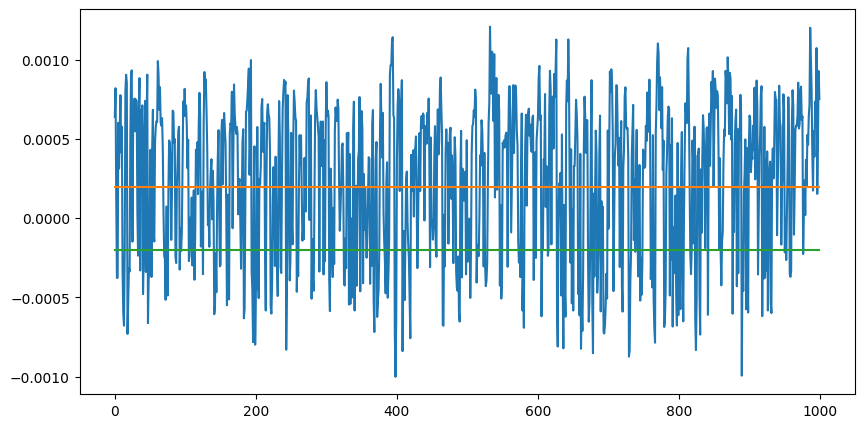

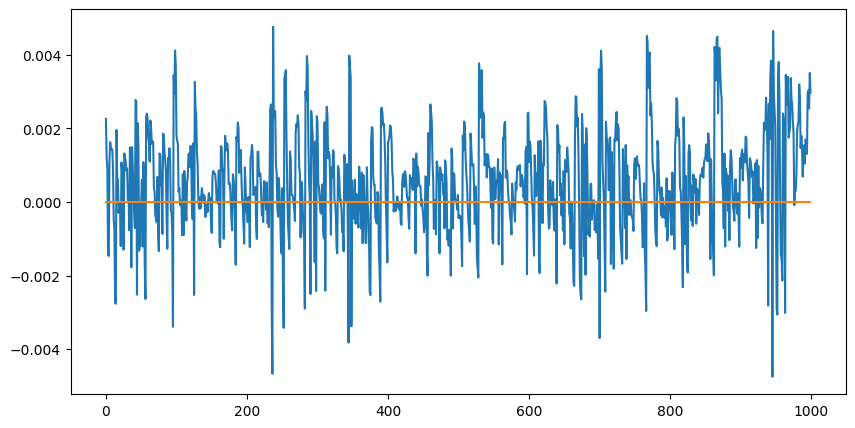

In [27]:
end = 1000
start = 0
pred = boost.predict(X_test[start:end])
p,q = 0.0002, 1
print((np.sign(pred.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)]) == np.sign(y_test[start:end].reshape(-1)[(abs(pred)>p) & (abs(pred) < q)])).mean())
print("Long wr:", (np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_test[start:end].reshape(-1)[((pred)>p) & ((pred) < q)])).mean())
print("Short wr:", (np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_test[start:end].reshape(-1)[((pred)<-p) & ((pred) > -q)])).mean())
print("Part of such samples:", ((abs(pred)>p) & (abs(pred) < q)).mean())
plt.figure(figsize=(10,5))
plt.plot(range(end-start), (pred)*np.sign(y_test[start:end]))
plt.plot(range(end-start), [p]*(end-start))
plt.plot(range(end-start), [-p]*(end-start))
plt.show()
plt.figure(figsize=(10,5))
plt.plot(range(end-start), np.sign(pred)*(y_test[start:end]))
plt.plot(range(end-start), [0]*(end-start))

In [28]:
pred = boost.predict(X_val)
p,q = 0.0002, 1
print((np.sign(pred.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)]) == np.sign(y_val.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)])).mean())
print("Long wr:", (np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_val.reshape(-1)[((pred)>p) & ((pred) < q)])).mean())
print("Short wr:", (np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_val.reshape(-1)[((pred)<-p) & ((pred) > -q)])).mean())
print("Part of such samples:", ((abs(pred)>p) & (abs(pred) < q)).mean())

0.6821052631578948
Long wr: 0.7091152815013405
Short wr: 0.6524300441826215
Part of such samples: 0.8553421368547419


In [29]:
for i in range(20):
    pred = boost.predict(X_val)
    p,q = 0.00001*i, 1
    print((np.sign(pred.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)]) == np.sign(y_val.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)])).mean())
    print("Long wr:", (np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_val.reshape(-1)[((pred)>p) & ((pred) < q)])).mean())
    print("Short wr:", (np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_val.reshape(-1)[((pred)<-p) & ((pred) > -q)])).mean())
    print("Part of such samples:", ((abs(pred)>p) & (abs(pred) < q)).mean())

0.6548619447779112
Long wr: 0.6857798165137615
Short wr: 0.6209068010075567
Part of such samples: 1.0
0.6548192771084337
Long wr: 0.6865671641791045
Short wr: 0.6197718631178707
Part of such samples: 0.9963985594237695
0.6537295330503335
Long wr: 0.6851851851851852
Short wr: 0.619108280254777
Part of such samples: 0.9897959183673469
0.6528623629719854
Long wr: 0.6837209302325581
Short wr: 0.618925831202046
Part of such samples: 0.985594237695078
0.654601226993865
Long wr: 0.6838407494145199
Short wr: 0.6224226804123711
Part of such samples: 0.978391356542617
0.655940594059406
Long wr: 0.6871310507674144
Short wr: 0.6215864759427828
Part of such samples: 0.9699879951980792
0.6566978193146418
Long wr: 0.6883886255924171
Short wr: 0.621550591327201
Part of such samples: 0.9633853541416567
0.6599622878692646
Long wr: 0.6917562724014337
Short wr: 0.6246684350132626
Part of such samples: 0.9549819927971188
0.6595072646873026
Long wr: 0.6899038461538461
Short wr: 0.625832223701731
Part of suc

In [34]:
long_list = []
short_list = []
long_list_w = []
short_list_w = []
for i in (range(0, y_test.shape[0]-10000, 100)):
    st, en = i, i+100
    p, q = 0.0001, 1
    pred = boost.predict(X_test[st:en])
    print((np.sign(pred.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)]) == np.sign(y_test[st:en].reshape(-1)[(abs(pred)>p) & (abs(pred) < q)])).mean())
    print("Long wr:", (np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_test[st:en].reshape(-1)[((pred)>p) & ((pred) < q)])).mean())
    print("Short wr:", (np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_test[st:en].reshape(-1)[((pred)<-p) & ((pred) > -q)])).mean())
    print("Part of such samples:", ((abs(pred)>p) & (abs(pred) < q)).mean())
    print("stability:", (y_test[st:en]>0).mean())
    print( "If good profit: ", y_test[st:en][(pred>p) & (y_test[st:en]>0)].sum(), " If good profit: ", y_test[st:en][(pred<-p) & (y_test[st:en]<0)].sum())
    print("If bad loss: ", y_test[st:en][(pred>p) & (y_test[st:en]<0)].sum(), " If bad loss: ", y_test[st:en][(pred<-p) & (y_test[st:en]>0)].sum())
    long_list.append((np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_test[st:en].reshape(-1)[((pred)>p) & ((pred) < q)])).sum())
    short_list.append((np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_test[st:en].reshape(-1)[((pred)<-p) & ((pred) > -q)])).sum())
    short_list_w.append((((pred)<-p) & ((pred) > -q)).sum())
    long_list_w.append((((pred)>p) & ((pred) < q)).sum())

0.6702127659574468
Long wr: 0.65
Short wr: 0.6851851851851852
Part of such samples: 0.94
stability: 0.44
If good profit:  0.026785984194676038  If good profit:  -0.06443158398254101
If bad loss:  -0.01447761950170312  If bad loss:  0.017591317776735726
0.7176470588235294
Long wr: 0.7884615384615384
Short wr: 0.6060606060606061
Part of such samples: 0.85
stability: 0.63
If good profit:  0.03779695610544431  If good profit:  -0.02190203713522354
If bad loss:  -0.007754561730935805  If bad loss:  0.007035370460238166
0.6593406593406593
Long wr: 0.5405405405405406
Short wr: 0.7407407407407407
Part of such samples: 0.91
stability: 0.39
If good profit:  0.020919590854155956  If good profit:  -0.06226402067642711
If bad loss:  -0.026409762220107158  If bad loss:  0.00854935715708871
0.6067415730337079
Long wr: 0.575
Short wr: 0.6326530612244898
Part of such samples: 0.89
stability: 0.45
If good profit:  0.028577175996632675  If good profit:  -0.034215290059567915
If bad loss:  -0.014719265556

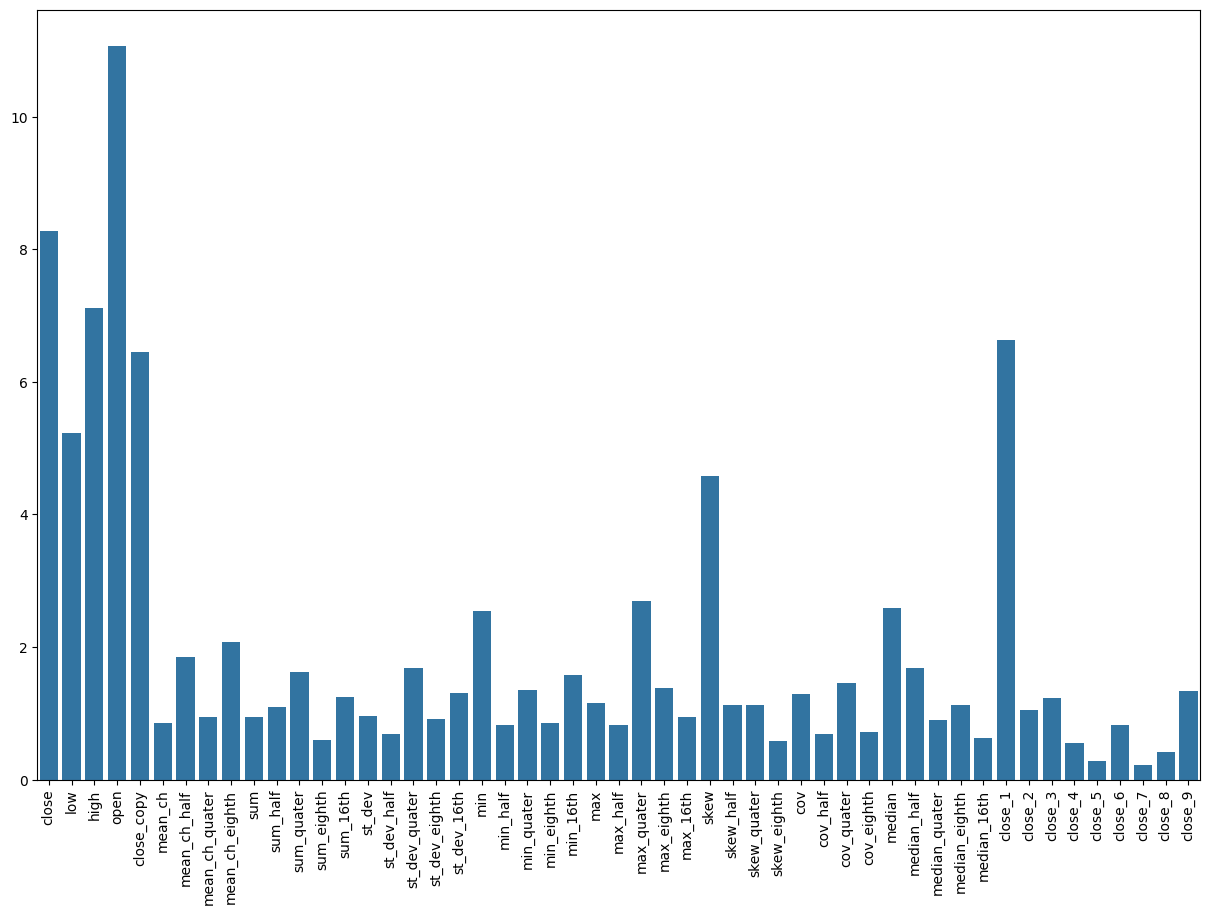

In [35]:
d = boost.feature_importances_
# d.sort()
# d = d[::-1]
plt.figure(figsize=(15,10))
sns.barplot(data=pd.Series(data=d,index=boost.feature_names_))
ticks = plt.xticks(rotation=90)
plt.show()

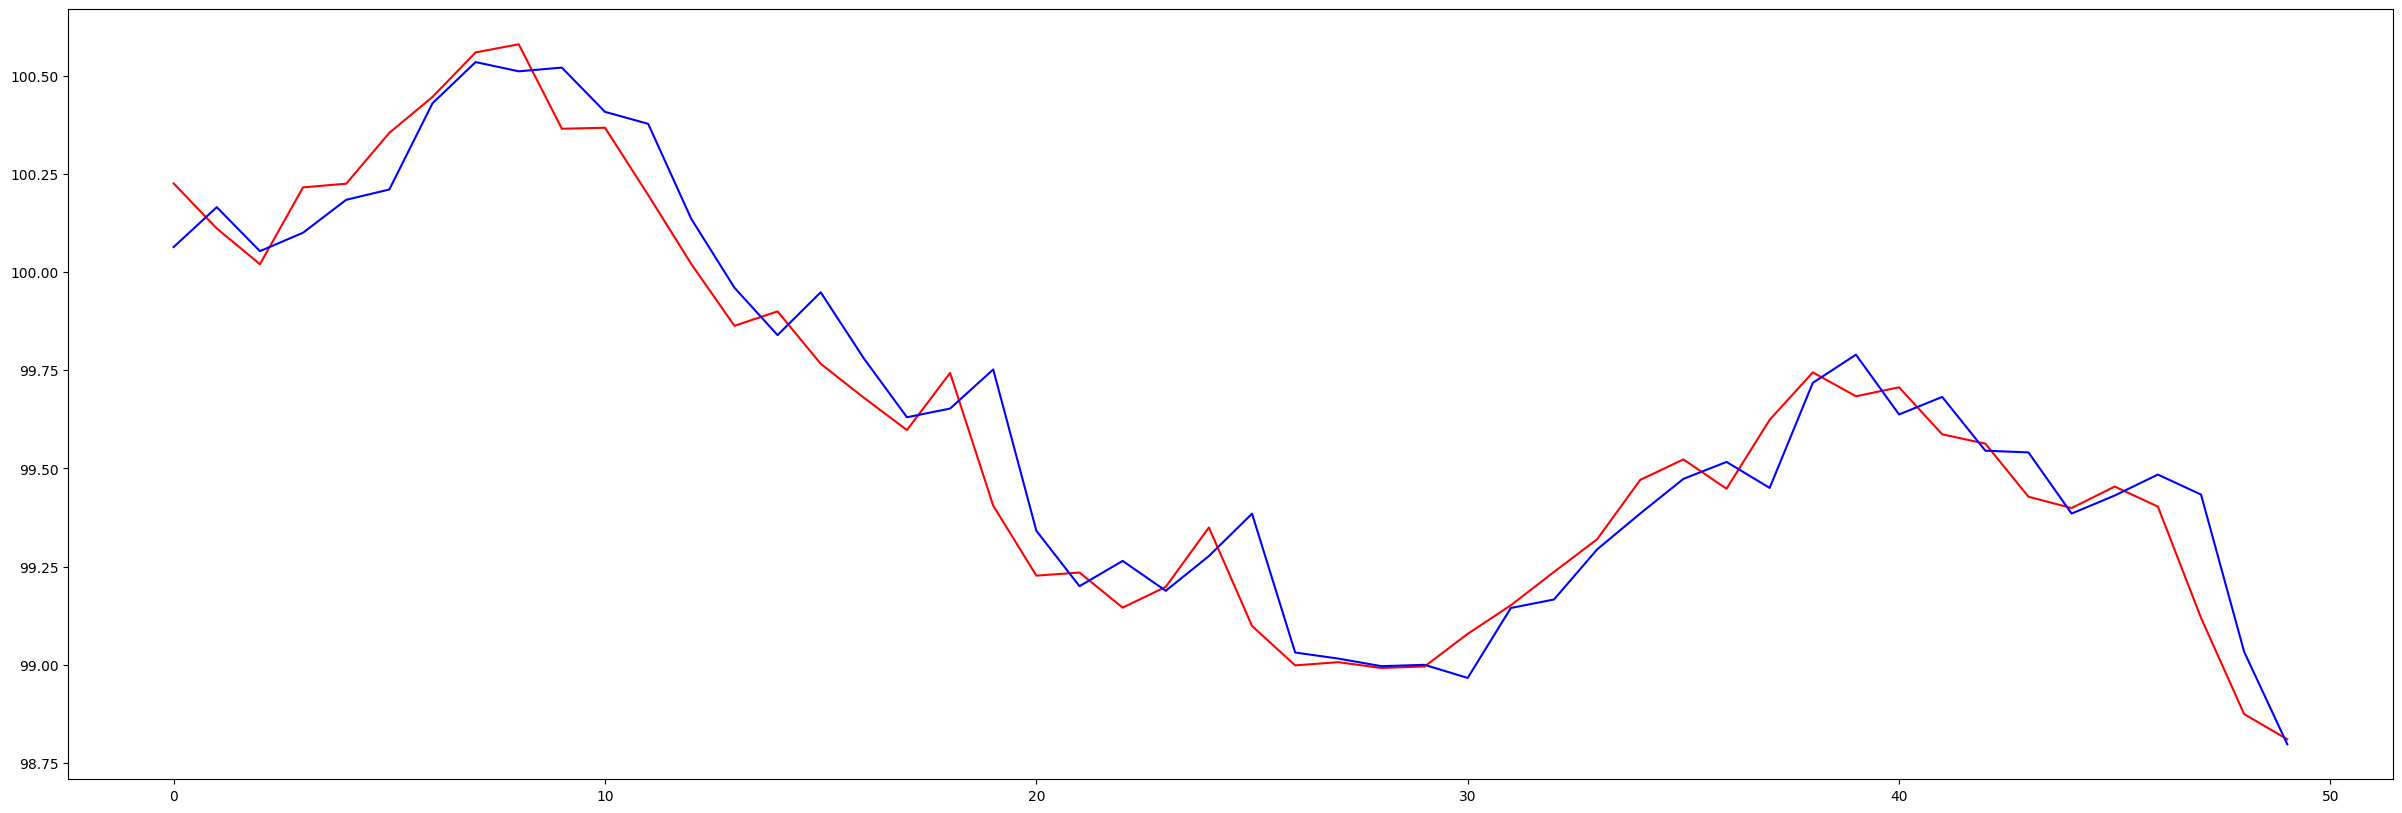

In [36]:
pred_ = boost.predict(X_test)
start_real = 100
start_pred = 100
real = []
pred = []
for i, prediction in enumerate(pred_):
    if i%5 == 0:
        start_pred = start_real*(prediction+1)
        start_real = start_real*(y_test[i]+1)
        real.append(start_real)
        pred.append(start_pred)
plt.figure(figsize=(30,10))
plt.plot(range(len(real[:50])), real[:50], color="red")
plt.plot(range(len(pred[:50])), pred[:50], color="blue")

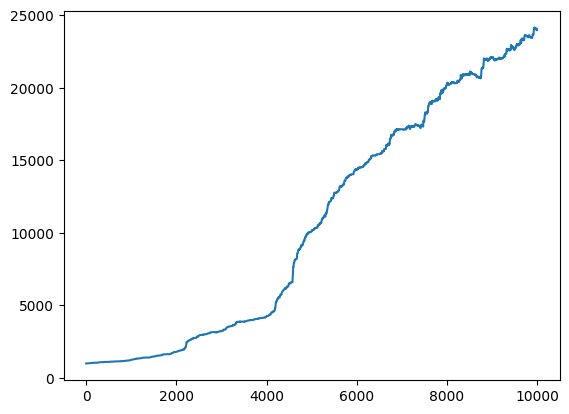

In [37]:
res_list = []
res = 1000
com = 0.0005
p = 0.0006
pred = boost.predict(X_test)
for i, prediction in enumerate(pred):
    if np.sign(prediction) == np.sign(y_test[i]) and abs(prediction) > p:
        res += res*(abs(y_test[i])-com)
    elif abs(prediction) > p and np.sign(prediction) != np.sign(y_test[i]):
        res -= res*(abs(y_test[i])+com)
    res_list.append(res)
plt.plot(range(len(res_list[0:10000])), res_list[0:10000])
plt.show()